# MANU 465 - Project Proposal



# Authors


|       Name      | Student ID |
|:---------------:|:----------:|
|   Anant Goyal   |  46894325  |
| Alberto Mussali |  50684182  |
|    Musa Habib   |  25899808  |
| Sadul Bombuwala |  76343292  |


# 1.0 Motivation
Possibly the most incredible aspect of Machine Learning and Artificial Intelligence is the ability to mimic human-like decision making. Upon learning about how Artificial Neural Networks are constructed and how they work, we were incredibly intrigued by the workings of the neural networks without our brains. We see this project as a means to further study and understand the complexities of our minds. Collecting and analyzing brainwave data is something we have never had the opportunity to do, and we hope that during the course of this project we will gain a valuable understanding of how brainwave data within humans can be used for research in the world of Artifical Intelligence.


# 2.0 Objective and Goals

**Objective: To be able to use machine learning models to predict whether or not a person is tired, based on brainwave data.**

The Muse 2 is a multi-sensor meditation device that provides real-time feedback on brain activity, heart rate, breathing, and body movements to help users build a consistent meditation practice. When paired with the Mind Monitor phone application, one can view and analyze the neural oscillation readings picked up by the Muse 2, and use this headband for purposes beyond medidation.

https://choosemuse.com/muse-2/
https://mind-monitor.com/

Our project aims to use these tools to collect data on the variations in brain activity when an inividual is in a Sleep-deprived state of mind, and compare this to when they are well rested. Using this data we plan to build a Machine Learning algorithm which accurately predicts the level of sleep deprivation of an individual, based on the brainwave data passed into the algorithm.

# 3.0 Theoretical Frameworks

## 3.1 Neural Oscillations

This section will explore the scientific background regarding neural oscillations, more popularly referred to as brainwaves. Neural oscillations are the repetitive patterns of neural activity that are observed in the Central Nervous System. These oscillations can be characterized by their amplitude, phase, and frequency by performing time-frequency analysis on a recording of neural activity.

There are several well-known bands of neural activity that can be measured via EEG. Each band is associated with different kinds of behaviors and pathologies. A comparison of all the EEG bands follows.

|  Band | Frequency (Hz) |                                                  Location                                                  |                                                                                                               Normally                                                                                                               |                                                                                             Pathologically                                                                                            |
|:-----:|:--------------:|:----------------------------------------------------------------------------------------------------------:|:------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------:|:-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------:|
| Delta |       < 4      |                     frontally in adults, posteriorly in children; high-amplitude waves                     |                                                                       adult slow-wave sleep in babies Has been found during some continuous-attention tasks                                                                      |                                                    subcortical lesions diffuse lesions metabolic encephalopathy hydrocephalus deep midline lesions                                                    |
| Theta |       4–7      |                               Found in locations not related to task at hand                               |    higher in young children drowsiness in adults and teens idling Associated with inhibition of elicited responses (has been found to spike in situations where a person is actively trying to repress a response or action).    |                                               focal subcortical lesions metabolic encephalopathy deep midline disorders some instances of hydrocephalus                                               |
| Alpha |      8–15      | posterior regions of head, both sides, higher in amplitude on dominant side. Central sites (c3-c4) at rest |                            relaxed/reflecting closing the eyes Also associated with inhibition control, seemingly with the purpose of timing inhibitory activity in different locations across the brain.                            |                                                                                                  coma                                                                                                 |
|  Beta |      16–31     |              both sides, symmetrical distribution, most evident frontally; low-amplitude waves             |                                                               range span: active calm → intense → stressed → mild obsessive active thinking, focus, high alert, anxious                                                              |                                                                                  benzodiazepines Dup15q syndrome                                                                                  |
| Gamma |      > 32      |                                            Somatosensory cortex                                            | Displays during cross-modal sensory processing (perception that combines two different senses, such as sound and sight) Also is shown during short-term memory matching of recognized objects, sounds, or tactile sensations | A decrease in gamma-band activity may be associated with cognitive decline, especially when related to the theta band; however, this has not been proven for use as a clinical diagnostic measurement |
|   Mu  |      8–12      |                                             Sensorimotor cortex                                            |                                                                                                  Shows rest-state motor neurons.                                                                                                 |                     Mu suppression could indicate that motor mirror neurons are working. Deficits in Mu suppression, and thus in mirror neurons, might play a role in autism.                     |

Retrieved from: [Wikipedia: Electroencephalography](https://en.wikipedia.org/wiki/Electroencephalography).

The aforementioned frequency bands  are not standarized in literature, MindMonitor defines the frequencies as:

|  Band | Frequency Range (Hz) |
|:-----:|:-------------:|
| Delta |       1-4     |
| Theta |       4-8     |
| Alpha |     7.5-13    |
|  Beta |      13-30    |
| Gamma |      30-44    |

Retrieved from: [MindMonitor Documentation](https://mind-monitor.com/Technical_Manual.php#help_graph_absolute)

These definitions will be used throughout this project.

## 3.2 Electroencephalography (EEG)

Electroencephalography (EEG) is a powerful medical diagnosis tool that has been in use since the early 20th century. It allows the electrical activity of the brain to be monitored. Specifically, EEG measures the voltage fluctuations in the brain which result from neuronal activity. While the voltage fluctuations of a single neuron are too minute to be detected, an EEG device is capable of detecting the "summation of the synchronous activity of thousands or millions of neurons that have similar spatial orientation." ([EEG](https://en.wikipedia.org/wiki/Electroencephalography))

## 3.3 Muse 2 Headband

The Muse 2 headband contains several four electrodes which are essential in recording the neural oscillations of the brain. These sensors are:

- TP9  - Left ear
- AF7  - Left forehead
- AF8  - Right forehead
- TP10 - Right ear
- AUXR - Right Auxiliary

All four electrodes measure and record the voltage in $[\mu V]$ as the raw data. As illustrated above, the actual power band data is provided by MindMonitor. These data are calculated using the Discrete Fourier Transform by applying a Fast Fourier Transform algorithm on the raw values.

## 3.4 Fast Fourier Transform (FFT)

From [Wikipedia: FFT](https://en.wikipedia.org/wiki/Fast_Fourier_transform):
> A fast Fourier transform (FFT) is an algorithm that computes the discrete Fourier transform (DFT) of a sequence, or its inverse (IDFT). Fourier analysis converts a signal from its original domain (often time or space) to a representation in the frequency domain and vice versa. 

By performing a FFT on the raw electrode data, we're able to separate the summation of all incoming neural oscillations into its constituent components, i.e. frequency bands. This will allow us to characterize and analyze each of the individual bands separately. Additionally, performing a FFT on the raw data effectively creates more features that the ML algorithms can use to predict the target variable. Instead of having the raw voltage for each of the electrodes as a single feature, each electrode will have data for each frequency band. (See this section of the [Archived Muse Documentation](https://web.archive.org/web/20181105231756/http://developer.choosemuse.com/tools/available-data#Raw_FFTs_for_Each_Channel) for more information.)


# 4.0 Methods


## 4.1 Features

MindMonitor (MM) allows us to record and extract the following features in a .csv format.

|       **Features**       | **Description**                                                        | **Range / Units**                           |
|:------------------------:|:-----------------------------------------------------------------------:|:-----------------------------------------------:|
|         TimeStamp        | Date and Time                                                          | Year-Month-Day Hour:Minute:Second.Microsecond |
| Delta_{TP9,AF7,AF8,TP10} | Delta brainwaves, for each of the four sensors                         | Bels                                          |
| Theta_{TP9,AF7,AF8,TP10} | Theta brainwaves, for each of the four sensors                         | Bels                                          |
| Alpha_{TP9,AF7,AF8,TP10} | Alpha brainwaves, for each of the four sensors                         | Bels                                          |
|  Beta_{TP9,AF7,AF8,TP10} | Beta brainwaves, for each of the four sensors                          | Bels                                          |
| Gamma_{TP9,AF7,AF8,TP10} | Gamma brainwaves, for each of the four sensors                         | Bels                                          |
|  RAW_{TP9,AF7,AF8,TP10}  | RAW brainwaves, for each of the four sensors                           | 0.0 - 1682.815 uV                             |
|         AUX_RIGHT        | RAW brainwaves for the auxiliary USB sensor (not available with MU-01) | 0.0 - 1682.815 uV                             |
|   Accelerometer_{X,Y,Z}  | Gravity. X = tilt up/down, Y = tilt left/right, Z = vertical up/down   | g {-2:+2}                                     |
|       Gyro_{X,Y,Z}       | Gyroscope motion over time (returns to zero)                           | degrees/second {-245:+245}                    |
|        HeadBandOn        | Basic data quality indicator: if the headband is on the head           | 1=True, 0=False                               |
|  HSI_{TP9,AF7,AF8,TP10}  | Data quality, for each of the four sensors (HSI=Horse Shoe Indicator)  | 1=Good, 2=Medium, 4=Bad                       |
|          Battery         | Battery charge percentage                                              | %/100                                         |
|         Elements         | Data markers such as Blink, Jaw_Clench, or numbered markers            | <various>                                     |

Retrieved from: [MindMonitor Documentation](https://mind-monitor.com/FAQ.php#Compatibility)

Additionally, more features can be engineered in order to provide the ML algorithms with more information. The relative band power, for example, is commonly used in literature. (see [this article](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4712412/), for example.)


>The relative band powers are calculated by dividing the absolute linear-scale power in one band over the sum of the absolute linear-scale powers in all bands. The linear-scale band power can be calculated from the log-scale band power thusly: linear-scale band power = 10^ (log-scale band power).

Retrieved from: [Muse Developer Documentation](https://web.archive.org/web/20181105231756/http://developer.choosemuse.com/tools/available-data#Relative_Band_Powers)

In order to engineer these features, we employ a formula similar to the following, which calculates the relative band power of the alpha brainwaves.
    
<img src="https://latex.codecogs.com/svg.latex?\alpha_r&space;=&space;\frac{10^{\alpha_a}}{10^{\alpha_a}&space;&plus;&space;10^{\beta_a}&space;&plus;&space;10^{\delta}&space;&plus;&space;10^{\gamma_a}&space;&plus;&space;10^{\theta_a}}" title="\alpha_r = \frac{10^{\alpha_a}}{10^{\alpha_a} + 10^{\beta_a} + 10^{\delta} + 10^{\gamma_a} + 10^{\theta_a}}" />
    
Finally, the features: "TimeStamp", "Battery", and "HeadBandOn" will be discarded during processing given that they are irrelevant for the classification problem at hand. Similarly the target variable **ISTired?** will be added as a binary variable where {1=Tired, 0=NotTired}. 


## 4.2 Models

If the only features used in the model were the absolute and relative brainwaves, it is our intuition that classification models such as **Kernel SVC**, **Random Forest**, or **Logistic Regression** could be used to succesfully train the model. However, since data for the gyroscope, accelerometer, jaw clenching, and blinking is available, we believe that a deep-learning neural network (NN) such as **ANN** or **CNN** would leverage these features alongside the absolute and relative brainwaves to achieve better performance than other classification models.

## 4.3 Optimization

The best performing models after a pre-evaluation round will be further optimized using GridSearchCV. GridSearchCV will explore different hyper-parameter combinations, ensuring that these models achieve the best accuracy possible while using the same training data. This is a necessary step since hyper-parameters are not learnt from estimators, but are instead chosen when creating the model.

Optimizing the models before evaluation will ensure that only the best performing models are evaluated, and that programmer bias does not affect the performance of the models.

## 4.4 Evaluation

All trained models will be evaluated using methods from Scikit-Learn. In particular, K-Fold Cross-Validation (CV) will be employed in order to test all models across several train/test splits and gain insight into their expected performance. 
This method allows us to gain insight not only into the model's expected accuravcy, but also the distribution of said accuracy. It is then possible to analyze the probabilities associated with a model performing better (or worse) than others.

# 5.0 Project Timeline


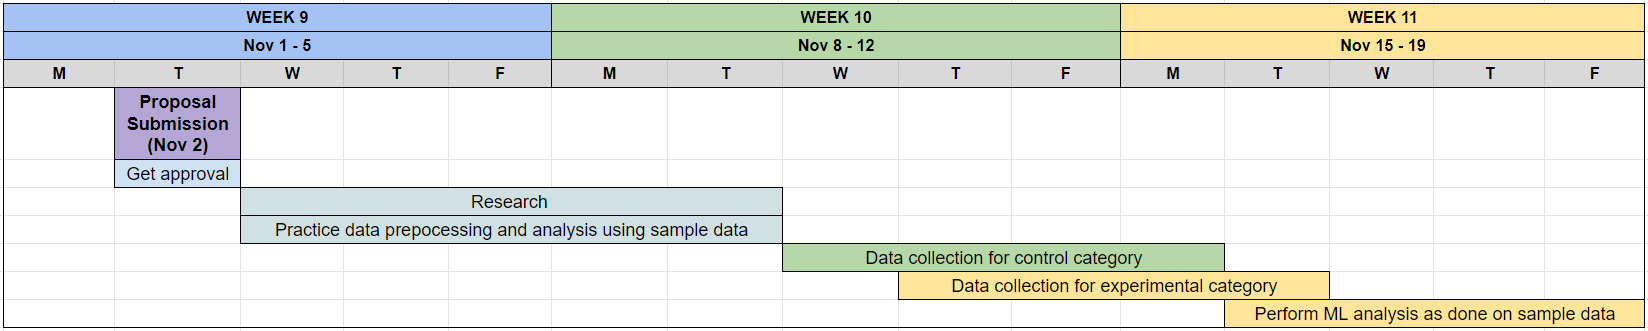

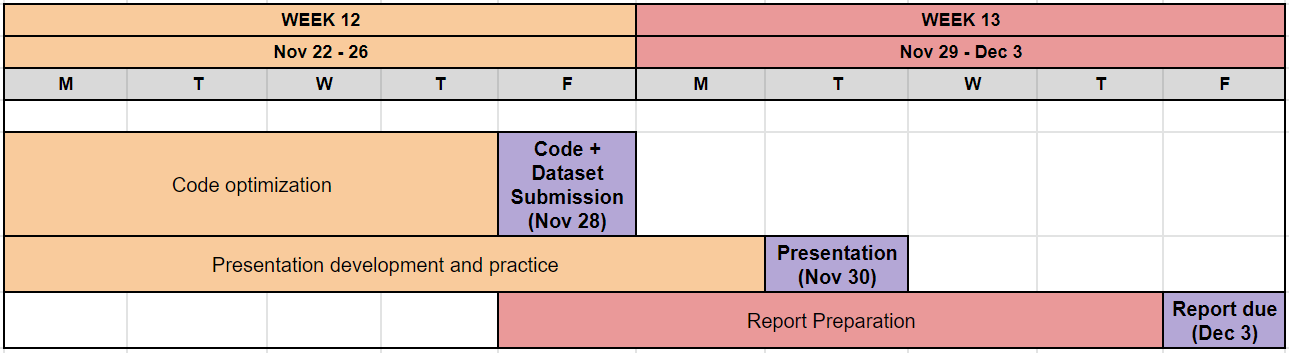